### pip install darts

In [ ]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 7.6 MB/s 
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
     |████████████████████████████████| 1.9 MB 17.2 MB/s 
     |████████████████████████████████| 9.9 MB 32.9 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 575 kB 41.9 MB/s 
     |████████████████████████████████| 9.4 MB 23.8 MB/s 
     |████████████████████████████████| 91 kB 8.3 MB/s 
     |████████████████████████████████| 799 kB 40.7 MB/s 
     |████████████████████████████████| 1.6 MB 41.6 MB/s 
     |████████████████████████████████| 965 kB 21.8 MB/s 
     |████████████████████████████████| 295 kB 38.0 MB/s 
     |████████████████████████████████| 125 kB 35.0 MB/s 
     |████████████████████████████████| 512 kB 49.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Un

### Loading Data

In [ ]:
!git clone https://github.com/al3xkras/arima-python-examples.git

fatal: destination path 'arima-python-examples' already exists and is not an empty directory.


In [ ]:
!ls -GFlash --color ./arima-python-examples/

total 400K
4.0K drwxr-xr-x 3 root 4.0K Dec  9 17:08 ./
4.0K drwxr-xr-x 1 root 4.0K Dec  9 17:08 ../
196K -rw-r--r-- 1 root 193K Dec  9 17:08 Currencies-TimeSeriesForecasting.ipynb
188K -rw-r--r-- 1 root 187K Dec  9 17:08 currencies.xls
4.0K drwxr-xr-x 8 root 4.0K Dec  9 17:08 .git/
4.0K -rw-r--r-- 1 root  221 Dec  9 17:08 .gitignore


In [ ]:
import pandas as pd
from pathlib import Path
path = Path('./arima-python-examples')
raw_df = pd.read_excel(path/'currencies.xls')
raw_df = raw_df.iloc[1:236, :-2]
raw_df

,data,1 THB,1 USD,1 AUD,1 HKD,1 CAD,1 NZD,1 SGD,1 EUR,100 HUF,...,1 MXN,1 ZAR,1 BRL,1 MYR,1 RUB,10000 IDR,100 INR,100 KRW,1 CNY,1 XDR
1,2022-01-03 00:00:00,0.1219,4.0424,2.9329,0.5185,3.1881,2.7617,2.9958,4.5889,1.2482,...,0.1969,0.2554,0.7256,0.9688,0.0544,2.8336,5.4428,0.3388,0.6357,5.6787
2,2022-01-04 00:00:00,0.1216,4.0468,2.9185,0.5191,3.175,2.7505,2.9859,4.5737,1.2515,...,0.197,0.2535,0.7122,0.9668,0.054,2.8294,5.4278,0.3382,0.6349,5.643
3,2022-01-05 00:00:00,0.1219,4.0396,2.9274,0.5184,3.1775,2.7501,2.9797,4.5672,1.2627,...,0.1973,0.2539,0.7115,0.9633,0.0533,2.8136,5.4328,0.3372,0.6343,5.6551
4,2022-01-07 00:00:00,0.1198,4.0279,2.8823,0.5164,3.1683,2.7196,2.964,4.5576,1.2683,...,0.1973,0.2574,0.7087,0.957,0.0532,2.8055,5.422,0.3347,0.6318,5.6327
5,2022-01-10 00:00:00,0.1191,4.0064,2.8802,0.5139,3.1734,2.7124,2.9567,4.5377,1.2679,...,0.1962,0.2565,0.7111,0.9539,0.0535,2.8002,5.4107,0.3347,0.6286,5.6156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2022-11-30 00:00:00,0.1278,4.5066,3.0307,0.5779,3.3309,2.8114,3.2955,4.6684,1.1449,...,0.2344,0.266,0.8551,1.0133,NaN,2.8647,5.5339,0.3427,0.6351,5.9188
232,2022-12-01 00:00:00,0.1284,4.4911,3.0565,0.577,3.3455,2.8481,3.3075,4.6892,1.1438,...,0.2332,0.2596,0.8661,1.0195,NaN,2.8859,5.5299,0.344,0.6335,5.9421
233,2022-12-02 00:00:00,0.128,4.4492,3.0352,0.5719,3.3118,2.8509,3.2971,4.685,1.1458,...,0.2326,0.2564,0.858,1.0139,NaN,2.8839,5.4709,0.3427,0.6336,5.9195
234,2022-12-05 00:00:00,0.128,4.4415,3.0271,0.5719,3.3098,2.8451,3.2941,4.6898,1.146,...,0.2274,0.2577,0.851,1.0166,NaN,2.8715,5.4308,0.3425,0.6388,5.9117


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 1 to 235
Data columns (total 36 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       235 non-null    object
 1   1 THB      235 non-null    object
 2   1 USD      235 non-null    object
 3   1 AUD      235 non-null    object
 4   1 HKD      235 non-null    object
 5   1 CAD      235 non-null    object
 6   1 NZD      235 non-null    object
 7   1 SGD      235 non-null    object
 8   1 EUR      235 non-null    object
 9   100 HUF    235 non-null    object
 10  1 CHF      235 non-null    object
 11  1 GBP      235 non-null    object
 12  1 UAH      235 non-null    object
 13  100 JPY    235 non-null    object
 14  1 CZK      235 non-null    object
 15  1 DKK      235 non-null    object
 16  100 ISK    235 non-null    object
 17  1 NOK      235 non-null    object
 18  1 SEK      235 non-null    object
 19  1 HRK      235 non-null    object
 20  1 RON      235 non-null    objec

In [ ]:
raw_df.isna().sum()

data           0
1 THB          0
1 USD          0
1 AUD          0
1 HKD          0
1 CAD          0
1 NZD          0
1 SGD          0
1 EUR          0
100 HUF        0
1 CHF          0
1 GBP          0
1 UAH          0
100 JPY        0
1 CZK          0
1 DKK          0
100 ISK        0
1 NOK          0
1 SEK          0
1 HRK          0
1 RON          0
1 BGN          0
1 TRY          0
1 ILS          0
100 CLP        0
1 PHP          0
1 MXN          0
1 ZAR          0
1 BRL          0
1 MYR          0
1 RUB        189
10000 IDR      0
100 INR        0
100 KRW        0
1 CNY          0
1 XDR          0
dtype: int64

In [ ]:
raw_df.describe()

,data,1 THB,1 USD,1 AUD,1 HKD,1 CAD,1 NZD,1 SGD,1 EUR,100 HUF,...,1 MXN,1 ZAR,1 BRL,1 MYR,1 RUB,10000 IDR,100 INR,100 KRW,1 CNY,1 XDR
count,235,235.0000,235.0000,235.0000,235.0000,235.0000,235.0000,235.0000,235.0000,235.0000,...,235.0000,235.0000,235.0000,235.0000,46.0000,235.0000,235.0000,235.0000,235.0000,235.0000
unique,235,110.0000,234.0000,224.0000,204.0000,228.0000,225.0000,229.0000,224.0000,210.0000,...,190.0000,171.0000,211.0000,221.0000,30.0000,232.0000,231.0000,163.0000,210.0000,232.0000
top,2022-01-03 00:00:00,0.1278,4.2935,3.2071,0.5472,3.6224,2.8206,3.1434,4.6361,1.1735,...,0.1973,0.2758,0.8953,1.0589,0.0522,2.9757,5.6325,0.3388,0.6796,5.9229
freq,1,7.0000,2.0000,2.0000,3.0000,2.0000,3.0000,2.0000,2.0000,3.0000,...,5.0000,5.0000,3.0000,2.0000,4.0000,2.0000,2.0000,4.0000,3.0000,2.0000


### Predicting with Darts
Darts’ Swiss Knife for Time Series Forecasting

https://towardsdatascience.com/darts-swiss-knife-for-time-series-forecasting-in-python-f37bb74c126

In [ ]:
#
import holidays
import pandas as pd
from darts import TimeSeries
#
holidays_dict = holidays.CH(years=(2022))
#
df_holidays = pd.DataFrame.from_dict(holidays_dict, orient='index').reset_index()
df_holidays = df_holidays.rename({'index':'ds', 0:'holiday'}, axis='columns')
df_holidays['ds'] = pd.to_datetime(df_holidays['ds'])
df_holidays = df_holidays.sort_values(by=['ds'])
df_holidays = df_holidays.reset_index(drop=True)
df_holidays

,ds,holiday
0,2022-01-01,Neujahrestag
1,2022-04-15,Karfreitag
2,2022-04-17,Ostern
3,2022-04-18,Ostermontag
4,2022-05-26,Auffahrt
5,2022-06-05,Pfingsten
6,2022-06-06,Pfingstmontag
7,2022-08-01,Nationalfeiertag
8,2022-12-25,Weihnachten


In [ ]:
raw_df.columns

Index(['data', '1 THB', '1 USD', '1 AUD', '1 HKD', '1 CAD', '1 NZD', '1 SGD',
       '1 EUR', '100 HUF', '1 CHF', '1 GBP', '1 UAH', '100 JPY', '1 CZK',
       '1 DKK', '100 ISK', '1 NOK', '1 SEK', '1 HRK', '1 RON', '1 BGN',
       '1 TRY', '1 ILS', '100 CLP', '1 PHP', '1 MXN', '1 ZAR', '1 BRL',
       '1 MYR', '1 RUB', '10000 IDR', '100 INR', '100 KRW', '1 CNY', '1 XDR',
       'nr tabeli', 'pełny numer tabeli'],
      dtype='object')

In [ ]:
selected = ['data', '1 CHF']
df = raw_df[selected].copy()
df = df.iloc[1:236, :]
df['data'] = pd.to_datetime(df['data'])
df['1 CHF'] = df['1 CHF'].astype(float)
df.columns = ['ds', 'y']
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      234 non-null    datetime64[ns]
 1   y       234 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.8 KB


In [ ]:
df.isna().sum()

ds    0
y     0
dtype: int64

In [ ]:
df

,ds,y
0,2022-01-04,4.4090
1,2022-01-05,4.4106
2,2022-01-07,4.3720
3,2022-01-10,4.3500
4,2022-01-11,4.3300
...,...,...
229,2022-11-30,4.7421
230,2022-12-01,4.7580
231,2022-12-02,4.7576
232,2022-12-05,4.7542


In [ ]:
df.describe()

,y
count,234.000000
mean,4.665525
std,0.213483
min,4.246500
25%,4.486050
50%,4.690750
75%,4.842550
max,5.120000


In [ ]:
import time
t_start1 = time.perf_counter()


%matplotlib inline

## Importing Libraries
import sys
import numbers
import time
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from functools import reduce

import pmdarima as pmd
import statsmodels.api as sm 
from scipy.stats import normaltest

from darts import TimeSeries
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    Theta
)
from darts.metrics import mape, mase, mae, mse, ope, r2_score, rmse, rmsle
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
from darts.dataprocessing.transformers.boxcox import BoxCox


#from darts.datasets import AirPassengersDataset, AusBeerDataset, GasRateCO2Dataset 
#from darts.datasets import HeartRateDataset, IceCreamHeaterDataset, MonthlyMilkDataset
#from darts.datasets import SunspotsDataset


import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)


MSEAS = 12                   # seasonality default
#MSEAS = 4                     # monts seasonality default
ALPHA = 0.05                  # significance level default

#TRAIN = dt.datetime(1957,5,1).date()            # training until date AirPassengers
## split train and test data
#TRAIN = dt.datetime(2022,6,25).date()            # training until date

In [ ]:
# Forecasting
## fit the chosen forecaster model and compute predictions

def eval_model(model):
    t_start =  time.perf_counter()
    print("beginning: " + str(model))


    # fit the model and compute predictions
    res = model.fit(train)
    forecast = model.predict(len(val))

    # for naive forecast, concatenate seasonal fc with drift fc
    if model == m_naive:
        if is_seasonal:
            fc_drift = forecast
            modelS = NaiveSeasonal(K=mseas)
            modelS.fit(train)
            fc_seas = modelS.predict(len(val))
            forecast = fc_drift + fc_seas - train.last_value()


    # compute accuracy metrics and processing time
    res_mape = mape(val, forecast)
    res_mae = mae(val, forecast)
    res_r2 = r2_score(val, forecast)
    res_rmse = rmse(val, forecast)
    res_rmsle = rmsle(val, forecast)
    res_time = time.perf_counter() - t_start
    res_accuracy = {"MAPE":res_mape, "MAE":res_mae, "R squared":-res_r2, "RMSE":res_rmse, "RMSLE":res_rmsle, "time":res_time}

    results = [forecast, res_accuracy]
    print("completed: " + str(model) + ":" + str(res_time) + "sec")
    return results

In [ ]:
series = TimeSeries.from_dataframe(selected_ts, 'ds','y', fill_missing_dates=True, freq='D')
series

<TimeSeries (DataArray) (ds: 337, component: 1, sample: 1)>
array([[[4.409 ]],

       [[4.4106]],

       [[   nan]],

       [[4.372 ]],

       [[   nan]],

       [[   nan]],

       [[4.35  ]],

       [[4.33  ]],

       [[4.3192]],

       [[4.3244]],

...

       [[   nan]],

       [[4.7555]],

       [[4.7449]],

       [[4.7421]],

       [[4.758 ]],

       [[4.7576]],

       [[   nan]],

       [[   nan]],

       [[4.7542]],

       [[4.7472]]])
Coordinates:
  * ds         (ds) datetime64[ns] 2022-01-04 2022-01-05 ... 2022-12-06
  * component  (component) object 'y'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

seasonal? False


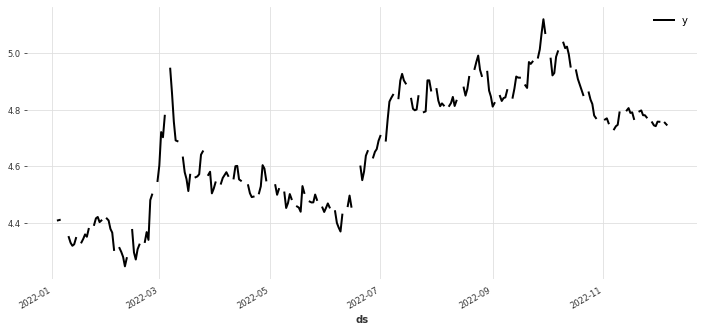

In [ ]:
import pandas as pd
from darts import TimeSeries

# !!!
selected_ts = df

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(selected_ts, 'ds','y', fill_missing_dates=True, freq='D')
series

# plot the observations
plt.figure(100, figsize=(12, 5))
series.plot()

# check for seasonality, via ACF

for m in range(2, 25):
    is_seasonal, mseas = check_seasonality(series, m=m, alpha=ALPHA)
    if is_seasonal:
        break

print("seasonal? " + str(is_seasonal))
if is_seasonal:
    print('There is seasonality of order {}.'.format(mseas))

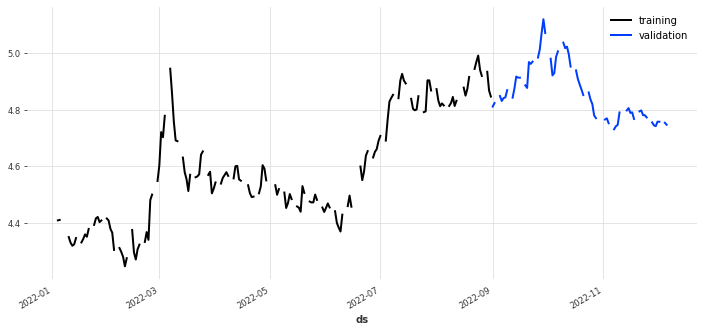

In [ ]:
## split train and test data
TRAIN = dt.datetime(2022,9,1).date()            # training until date
# split position: if string, then interpret as Timestamp
# if int, then interpretation as index
# if loat, then interpretation as %split
if isinstance(TRAIN, numbers.Number):
    split_at = TRAIN
else:
    split_at = pd.Timestamp(TRAIN)
train, val = series.split_before(split_at)

plt.figure(101, figsize=(12, 5))
train.plot(label='training')
val.plot(label='validation')
plt.legend();

In [ ]:
# The Five Forecast Methods
# prepare Naive forecaster

m_naive = NaiveDrift()



# prepare Exponential Smoothing forecaster
if is_seasonal:
    m_expon = ExponentialSmoothing(seasonal_periods=mseas)
else:
    m_expon = ExponentialSmoothing()



# prepare Prophet forecaster
# m_prophet = Prophet() 

m_prophet = Prophet(
                changepoint_prior_scale=0.5, 
                changepoint_range=0.9,
                #seasonality_mode='multiplicative', 
                seasonality_mode='additive', 
                holidays=df_holidays, 
                daily_seasonality=False,
                weekly_seasonality=False, 
                yearly_seasonality=False)



# prepare ARIMA forecaster

y = np.asarray(series.pd_series())
# get order of first differencing: the higher of KPSS and ADF test results
n_kpss = pmd.arima.ndiffs(y, alpha=ALPHA, test='kpss', max_d=2)
n_adf = pmd.arima.ndiffs(y, alpha=ALPHA, test='adf', max_d=2)
n_diff = max(n_adf, n_kpss)

# get order of seasonal differencing: the higher of OCSB and CH test results
n_ocsb = pmd.arima.OCSBTest(m=max(4,mseas)).estimate_seasonal_differencing_term(y)
n_ch = pmd.arima.CHTest(m=max(4,mseas)).estimate_seasonal_differencing_term(y)
ns_diff = max(n_ocsb, n_ch, is_seasonal * 1)

# set up the ARIMA forecaster
m_arima = AutoARIMA(
    start_p=1, d=n_diff, start_q=1,
    max_p=4, max_d=n_diff, max_q=4,
    start_P=0, D=ns_diff, start_Q=0, m=max(4,mseas), seasonal=is_seasonal,
    max_P=3, max_D=1, max_Q=3,
    max_order=5,                       # p+q+p+Q <= max_order
    stationary=False, 
    information_criterion="bic", alpha=ALPHA, 
    test="kpss", seasonal_test="ocsb",
    stepwise=True, 
    suppress_warnings=True, error_action="trace", trace=True, with_intercept="auto")


# prepare Theta forecaster

# search space for best theta value: check 100 alternatives
thetas = 2 - np.linspace(-10, 10, 100)

# initialize search
best_mape = float('inf')
best_theta = 0
# search for best theta among 50 values, as measured by MAPE
for theta in thetas:
    model = Theta(theta)
    res = model.fit(train)
    pred_theta = model.predict(len(val))
    res_mape = mape(val, pred_theta)

    if res_mape < best_mape:
        best_mape = res_mape
        best_theta = theta

m_theta = Theta(best_theta)   # best theta model among 100

ValueError: ignored